<a href="https://colab.research.google.com/github/turanserin/myapps/blob/master/osr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


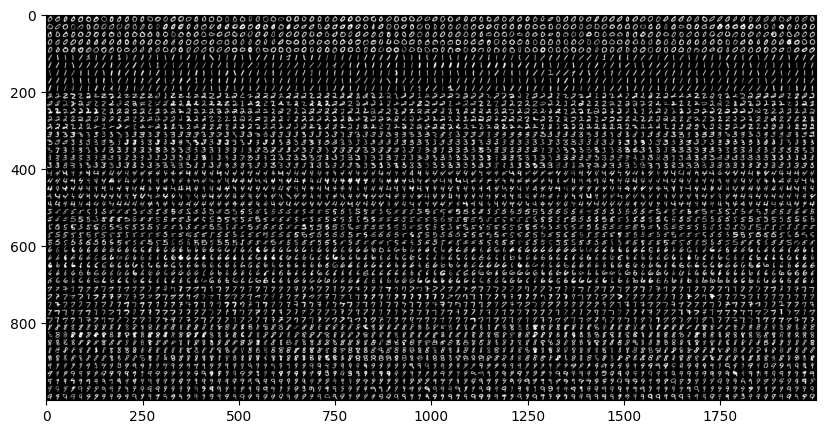

In [4]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/digits1.png')
image = np.array(image)

plt.figure(figsize=(10,5))
plt.imshow(image)
plt.show()

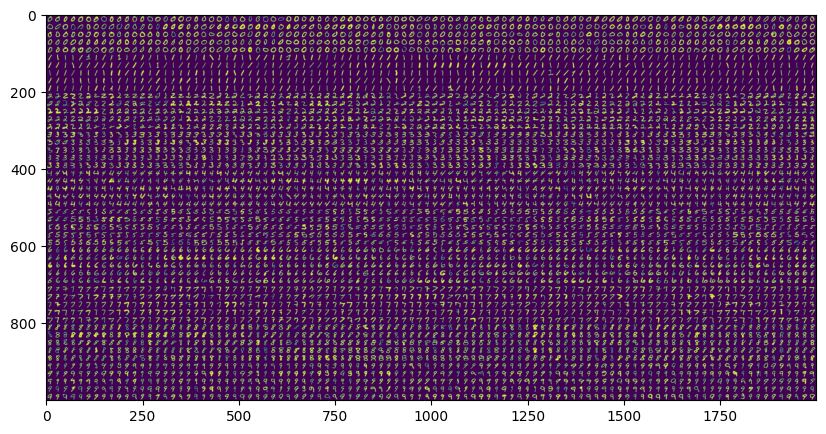

In [5]:


# Check if image loaded correctly
if image is None:
    print("Error: Image not found")
    exit()

# Grayscale conversion
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.array(gray_img)
plt.figure(figsize=(10,5))
plt.imshow(image)
plt.show()




In [8]:
# We will divide the image
# into 5000 small dimensions
# of size 20x20
divisions = list(np.hsplit(i,100) for i in np.vsplit(gray_img,50))

# Convert into Numpy array
# of size (50,100,20,20)
NP_array = np.array(divisions)
print(np.shape(NP_array))

(50, 100, 20, 20)


In [9]:

# Preparing train_data
# and test_data.
# Size will be (2500,20x20)
train_data = NP_array[:,:50].reshape(-1,400).astype(np.float32)

# Size will be (2500,20x20)
test_data = NP_array[:,50:100].reshape(-1,400).astype(np.float32)

In [11]:


# Create 10 different labels
# for each type of digit
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
print(train_labels)
test_labels = np.repeat(k,250)[:,np.newaxis]

[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


In [12]:

# Initiate kNN classifier
knn = cv2.ml.KNearest_create()



In [13]:
# perform training of data
knn.train(train_data,
		cv2.ml.ROW_SAMPLE,
		train_labels)

True

In [16]:


# obtain the output from the
# classifier by specifying the
# number of neighbors.
ret, output ,neighbours, distance = knn.findNearest(test_data, k = 5)

In [17]:


# Check the performance and
# accuracy of the classifier.
# Compare the output with test_labels
# to find out how many are wrong.
matched = output==test_labels
correct_OP = np.count_nonzero(matched)

#Calculate the accuracy.
accuracy = (correct_OP*100.0)/(output.size)

# Display accuracy.
print(accuracy)

91.76
